In [7]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experience Intel's "Performance Cores" and "Efficient Cores"

Intel's 12th generation processors also incorporate the idea of "Single ISA, Heterogeneous Architectures" or say "big.Little" architecture. In Linux system, the CPU id of p-cores comes first and then the e-cores. We can use taskset to see what the performance look like!

## Random from OS

In [8]:
hist_size = 1000000000
! make fiddle.exe; make C_OPTS="-O3" build/histogram.so
! ./fiddle.exe -lib ./build/histogram.so --header 'config,' --preamble 'all,' --detail -f run_private2_histogram -s {hist_size} --threads 1 2 3 4 -o histogram_private2_locks.csv

make: 'fiddle.exe' is up to date.
make: 'build/histogram.so' is up to date.
registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
sh: 1: /usr/sbin/changefreq: not found
sh: 1: /usr/sbin/changefreq: not found
Execution completed


In [10]:
hist_data = render_csv("histogram_private2_locks.csv", columns=["config"]+hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])


NameError: name 'hist_columns' is not defined

## P-cores only

In [11]:
! taskset -c 0,2,4,6,8,10,12,14 ./fiddle.exe -lib ./build/histogram.so -M 3600 --detail --header 'config,' --preamble 'pcores_only,' -f run_private2_histogram -s {hist_size} --threads 1 2 3 4 -o histogram_private2_locks_pcores_only.csv

registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
sh: 1: /usr/sbin/changefreq: not found
sh: 1: /usr/sbin/changefreq: not found
Execution completed


In [13]:
hist_data = render_csv(["histogram_private2_locks.csv", "histogram_private2_locks_pcores_only.csv"], columns=["config"]+hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
#plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])
plotPEBar(df=hist_data, what=[("threads", "speedup")])

NameError: name 'hist_columns' is not defined

## E-cores only

In [14]:
! cd ~/courses/CS203/demo/bigLittle;  taskset -c 16,17,18,19,20,21,22,23 ./fiddle.exe -lib ./build/histogram.so -M 3600 --detail  --header 'config,' --preamble 'ecores_only,'  -f run_private2_histogram -s {hist_size} --threads 1 2 3 4 -o histogram_private2_locks_ecores_only.csv

registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
sh: 1: /usr/sbin/changefreq: not found
sh: 1: /usr/sbin/changefreq: not found
Execution completed


In [15]:
hist_data = render_csv(["histogram_private2_locks.csv", "histogram_private2_locks_pcores_only.csv", "histogram_private2_locks_ecores_only.csv"], columns=["config"]+hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
#plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])
plotPEBar(df=hist_data, what=[("threads", "speedup")])

NameError: name 'hist_columns' is not defined

,config,function,threads,size,arg1,arg2,arg3,IC,CPI,ET,L1_dcache_misses,L1_dcache_miss_rate,Cycles,speedup,Total IC,Total cache misses
0,ecores_only,run_private2_histogram,1,1000000000,1,1,1,0,NaN,2.718254,0,NaN,0,1.000000,0,0
1,ecores_only,run_private2_histogram,2,1000000000,1,1,1,0,NaN,3.042235,0,NaN,0,0.893506,0,0
2,ecores_only,run_private2_histogram,3,1000000000,1,1,1,0,NaN,2.247353,0,NaN,0,1.209536,0,0
3,ecores_only,run_private2_histogram,4,1000000000,1,1,1,0,NaN,2.035097,0,NaN,0,1.335688,0,0


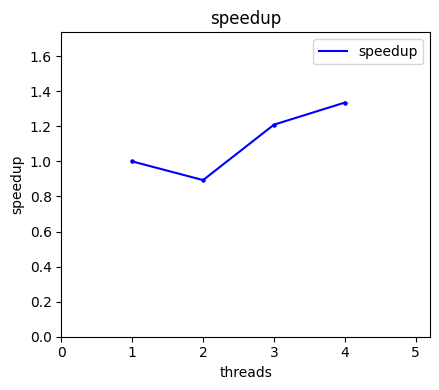

In [19]:
hist_data = render_csv("histogram_private2_locks_ecores_only.csv", columns=["config"]+hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])

## Half and half

In [30]:
! taskset -c 12,14,16,17 ./fiddle.exe -lib ./build/histogram.so -M 3600 --detail --header 'config,' --preamble 'half_and_half,' -f run_private2_histogram -s {hist_size} --threads 1 2 3 4 -o histogram_private2_locks_both.csv

registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
sh: 1: /usr/sbin/changefreq: not found
sh: 1: /usr/sbin/changefreq: not found
Execution completed


,config,function,threads,size,arg1,arg2,arg3,IC,CPI,ET,L1_dcache_misses,L1_dcache_miss_rate,Cycles,speedup,Total IC,Total cache misses
0,half_and_half,run_private2_histogram,1,1000000000,1,1,1,38004485492,0.351294,2.733448,79220080,0.003301,13350740930,1.000000,38004485492,79220080
1,half_and_half,run_private2_histogram,2,1000000000,1,1,1,38006357234,0.545080,2.165194,69758701,0.002906,20716504279,1.262449,76012714468,139517402
2,half_and_half,run_private2_histogram,3,1000000000,1,1,1,33648782939,0.523546,1.883353,138324878,0.006509,17616690653,1.451373,100946348817,414974634
3,half_and_half,run_private2_histogram,4,1000000000,1,1,1,26854201068,0.586190,1.665286,94612364,0.005579,15741654437,1.641429,107416804272,378449456


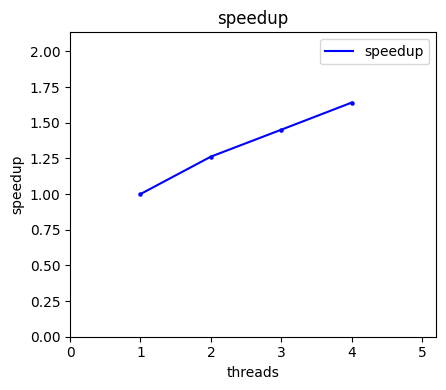

In [31]:
hist_data = render_csv("histogram_private2_locks_both.csv", columns=["config"]+hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])

/nfshome/htseng/courses/CS203/demo/bigLittle/notebook.py:282: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)
/nfshome/htseng/courses/CS203/demo/bigLittle/notebook.py:282: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d)


,function,threads,size,arg1,arg2,arg3,IC,CPI,ET,L1_dcache_misses,L1_dcache_miss_rate,Cycles,speedup,Total IC,Total cache misses
0,run_private2_histogram,1,1000000000,1,1,1,38004485492,0.351294,2.733448,79220080,0.003301,13350740930,1.000000,38004485492,79220080
1,run_private2_histogram,2,1000000000,1,1,1,38006357234,0.545080,2.165194,69758701,0.002906,20716504279,1.262449,76012714468,139517402
2,run_private2_histogram,3,1000000000,1,1,1,33648782939,0.523546,1.883353,138324878,0.006509,17616690653,1.451373,100946348817,414974634
3,run_private2_histogram,4,1000000000,1,1,1,26854201068,0.586190,1.665286,94612364,0.005579,15741654437,1.641429,107416804272,378449456
0,run_private2_histogram,1,1000000000,1,1,1,38004632468,0.330663,2.532788,16589928,0.000691,12566729882,1.079225,38004632468,16589928
1,run_private2_histogram,2,1000000000,1,1,1,38007354881,0.549305,2.145612,73336693,0.003055,20877625110,1.273971,76014709762,146673386
2,run_private2_histogram,3,1000000000,1,1,1,38007058393,0.564003,1.688684,66448357,0.002768,21436109917,1.618685,114021175179,199345071
3,run_private2_histogram,4,1000000000,1,1,1,38007718237,0.604431,1.414979,80262157,0.003344,22973044024,1.931794,152030872948,321048628
0,run_private2_histogram,1,1000000000,1,1,1,0,NaN,2.722284,0,NaN,0,1.004101,0,0
1,run_private2_histogram,2,1000000000,1,1,1,0,NaN,2.746918,0,NaN,0,0.995096,0,0


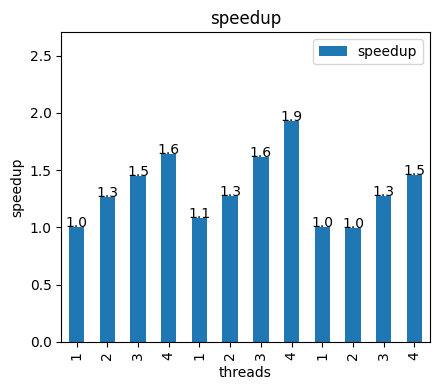

In [32]:
hist_data = render_csv(["histogram_private2_locks_both.csv", "histogram_private2_locks_pcores_only.csv", "histogram_private2_locks_ecores_only.csv"], columns=hist_columns+["Cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["threads"]
hist_data["Total cache misses"] = hist_data["L1_dcache_misses"]*hist_data["threads"]
display(hist_data)
#plotPE(df=hist_data, lines=True, what=[("threads", "speedup"), ])
plotPEBar(df=hist_data, what=[("threads", "speedup")])